# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**Please read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
#Prophet deregisters the Pandas converters in its code.
#Please check https://darektidwell.com/typeerror-float-argument-must-be-a-string-or-a-number-not-period-facebook-prophet-and-pandas/
pd.plotting.register_matplotlib_converters()

## Load Data

The input to Prophet is mandatorily a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [3]:
df = pd.read_csv('BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [5]:
df.columns = ['ds','y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.1 KB


## Create and Fit Model

In [10]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saurabhs\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [11]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [12]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [13]:
future.tail(24)

,ds
324,2019-01-01
325,2019-02-01
326,2019-03-01
327,2019-04-01
328,2019-05-01
329,2019-06-01
330,2019-07-01
331,2019-08-01
332,2019-09-01
333,2019-10-01


In [14]:
len(df)

324

In [15]:
len(future)

348


### Step 2: Predict and fill in the Future

In [16]:
forecast = m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1134.908951,1465.896081,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1170.093185,1507.026199,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1436.540910,1754.670114,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1412.159905,1750.332659,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1671.330901,2005.520814,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5204.920380,5078.922469,5393.627570,5193.298316,5217.345944,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4932.467403,5267.605416,5208.520773,5234.493750,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5012.569076,5353.221040,5223.083766,5251.227632,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5174.203054,5508.459023,5238.349825,5268.442414,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820
347,2020-12-01,5268.499722,6182.653786,6505.909068,5252.605820,5285.392586,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,0.0,0.0,0.0,6340.094626


In [19]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
324,2019-01-01,4447.251974,4275.313899,4605.712741
325,2019-02-01,4471.866329,4302.884764,4628.752024
326,2019-03-01,4714.223428,4549.787294,4868.314428
327,2019-04-01,4736.460897,4577.553317,4897.859778
328,2019-05-01,5007.337374,4836.566212,5158.156800
329,2019-06-01,4997.035530,4843.905248,5162.776095
330,2019-07-01,5142.952666,4981.562892,5311.034197
331,2019-08-01,5051.304295,4885.510991,5217.315348
332,2019-09-01,4911.375738,4751.059227,5075.075056
333,2019-10-01,4993.782414,4828.171389,5159.585032


### Plotting Forecast

We can use Prophet's own built in plotting tools

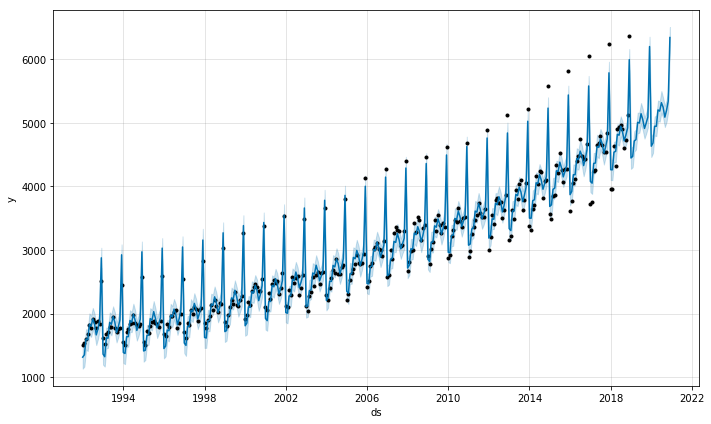

In [21]:
m.plot(forecast);

(735234.0, 738156.0)

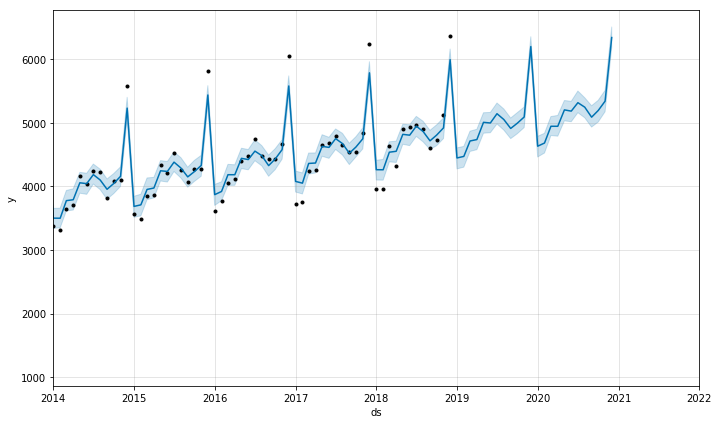

In [22]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

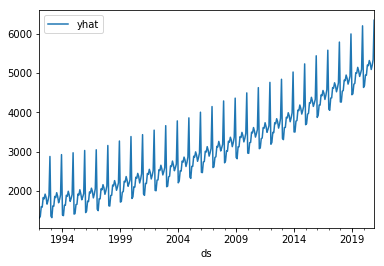

In [23]:
forecast.plot(x='ds',y='yhat')

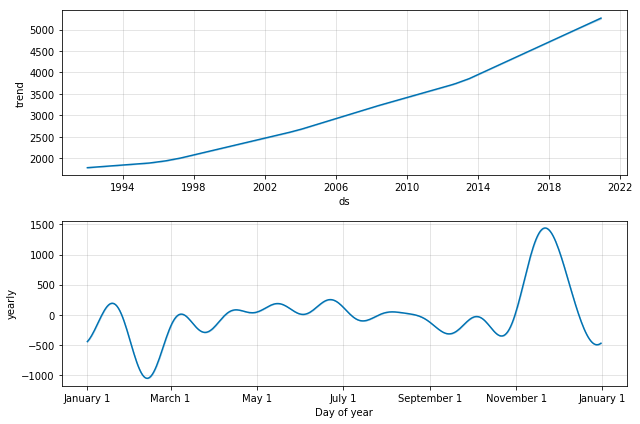

In [24]:
m.plot_components(forecast);
